<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/RedeNeural_CIP_COT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas usadas

# Inicialmente é necessário definir as bibliotecas que serão utilizadas para a execução do código corretamente:
import numpy as np
# numpy é a biblioteca numérica do Phyton
import pandas as pd
# pandas é a biblioteca responsável pela manipulação de arquivos
import matplotlib.pyplot as plt
# matplotlib.pyplot é a biblioteca usada para fazer gráficos no Phyton
from sklearn.neural_network import MLPRegressor
# sklearn.neural_network é a biblioteca usada para fazer classificação e regressão, neste caso, ela faz a regressão (MLPRegressor)
from sklearn.model_selection import train_test_split
#separa em treino e teste
from sklearn import preprocessing
#normaliza e retorna os dados
from sklearn.metrics import mean_squared_error
# Essa biblioteca é usada para fazer a soma dos quadrados dos desvios
from sklearn.metrics import r2_score 
# Essa biblioteca foi criada para avaliar se o ajuste está bom através do coeficiente de determinação
from google.colab import files
# Essa biblioteca é usada para carregar arquivos no Phyton

In [ ]:
# para gerar o grafico no browser
%matplotlib inline

In [ ]:
!git clone https://github.com/lucasdonizete/RedesNeurais
%cd RedesNeurais

fatal: destination path 'RedesNeurais' already exists and is not an empty directory.
/content/RedesNeurais


In [ ]:
# leitura dos dados
df=pd.read_csv("Dados_TeseCIP_Lucas.CSV")
print(df.head())

  Exp  X1  X2  X3  X4    TR    TE   COT   EXP   RED
0   1   1   1   1  -1  5.01  1.38  3.92  5.79  5.31
1   2   1   1  -1  -1  4.95  1.50  4.15  5.63  5.31
2   3   1  -1   1   1  5.07  1.55  3.46  5.95  6.09
3   4  -1   1  -1   1  5.34  2.09  5.06  5.91  5.05
4   5   1  -1  -1   1  5.74  2.41  4.19  5.61  6.12


In [ ]:
# separa as colunas de interesse

Index=[1,2,3,4,7]
X=df.iloc[:,Index].copy()
print(X.head())


   X1  X2  X3  X4   COT
0   1   1   1  -1  3.92
1   1   1  -1  -1  4.15
2   1  -1   1   1  3.46
3  -1   1  -1   1  5.06
4   1  -1  -1   1  4.19


In [ ]:
Index=[ 'COT']
y =df[Index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3)# 1

In [ ]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [ ]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [ ]:
# define a rede neural 

N_Hidden=20
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(18,17), max_iter=500,random_state=1 )

In [ ]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(18, 17), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [ ]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [ ]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))

   test calc  test true
0   4.994690       5.03
1   3.873950       3.89
2   5.691474       5.68
3   3.315675       3.25
4   4.477809       4.42


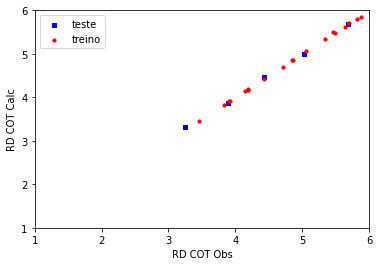

In [ ]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([1,6])
plt.ylim([1,6])
plt.ylabel('RD COT Calc')
plt.xlabel('RD COT Obs')
plt.show()

In [ ]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.0018582010973159841
R^2 teste= 0.9974218292523892


In [ ]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.00010392765361442018
R^2 treino= 0.9998129554460118
